In [1]:
import fxcmpy
API_TOKEN = "da038ab90320111cd99caad0998f1e6dd6d8121c"
api = fxcmpy.fxcmpy(access_token=API_TOKEN, log_level='error')

In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [4]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

td = tdr('USDJPY', start, stop)

td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426032 entries, 06/24/2018 21:00:17.081 to 06/29/2018 20:58:50.815
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Bid     1426032 non-null  float64
 1   Ask     1426032 non-null  float64
dtypes: float64(2)
memory usage: 32.6+ MB


In [6]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1426032 entries, 2018-06-24 21:00:17.081000 to 2018-06-29 20:58:50.815000
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Bid     1426032 non-null  float64
 1   Ask     1426032 non-null  float64
dtypes: float64(2)
memory usage: 32.6 MB


In [7]:
td.get_data()

,Bid,Ask
2018-06-24 21:00:17.081,109.841,109.889
2018-06-24 21:01:05.688,109.846,109.884
2018-06-24 21:01:30.545,109.847,109.885
2018-06-24 21:01:34.041,109.847,109.888
2018-06-24 21:01:34.043,109.847,109.895
...,...,...
2018-06-29 20:58:45.467,110.666,110.704
2018-06-29 20:58:46.094,110.668,110.704
2018-06-29 20:58:50.411,110.666,110.704
2018-06-29 20:58:50.545,110.666,110.705


<AxesSubplot:>

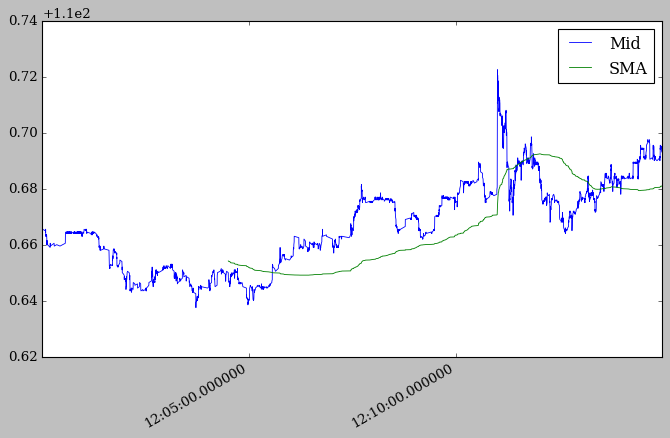

In [11]:
sub = td.get_data(start ='2018-06-29 12:00:00', end ='2018-06-29 12:15:00')
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()
sub[['Mid', 'SMA']].plot(figsize=(10,6), lw=0.75)

,count,mean,std,min,25%,50%,75%,max
Bid,4251.0,110.672049,0.017779,110.637000,110.659000,110.674000,110.684000,110.72100
Ask,4251.0,110.673323,0.017815,110.638000,110.660000,110.676000,110.685000,110.72400
Mid,4251.0,110.672686,0.017789,110.637500,110.660000,110.675000,110.684000,110.72250
SMA,3252.0,110.672997,0.014844,110.649091,110.657282,110.679772,110.686004,110.69243
